In [1]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

n_samples = len(X_test)

In [2]:
# one hot encoding
y_train_encoded = np.eye(43)[y_train]
y_test_encoded = np.eye(43)[y_test]

# normalizing the images


In [3]:
def normalize_greyscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # ToDo: Implement Min-Max scaling for greyscale image data
    Xmax = np.max(X_train)
    Xmin = np.min(X_train)
    a = 0.1
    b = 0.9
    
    Xnew = a + ((image_data - Xmin) * (b-a)) / (Xmax-Xmin)
     
    return Xnew






array([[[ 75,  78,  80],
        [ 74,  76,  78],
        [ 83,  84,  83],
        ..., 
        [ 67,  74,  73],
        [ 65,  69,  68],
        [ 66,  67,  66]],

       [[ 82,  83,  85],
        [ 80,  80,  82],
        [ 87,  86,  83],
        ..., 
        [ 73,  77,  77],
        [ 75,  77,  75],
        [ 79,  79,  77]],

       [[ 79,  79,  81],
        [ 84,  83,  85],
        [ 91,  88,  89],
        ..., 
        [ 72,  74,  72],
        [ 74,  75,  71],
        [ 78,  78,  74]],

       ..., 
       [[126, 128, 133],
        [118, 123, 128],
        [108, 117, 120],
        ..., 
        [ 96,  96,  90],
        [ 99, 101,  94],
        [ 99, 103,  99]],

       [[ 90,  94,  98],
        [ 91,  97, 103],
        [ 77,  87,  92],
        ..., 
        [104, 104,  97],
        [107, 111, 102],
        [ 95, 103,  97]],

       [[ 85,  84,  87],
        [ 93,  99, 104],
        [ 69,  80,  85],
        ..., 
        [101, 102,  94],
        [ 98, 101,  90],
        [ 90,  97,

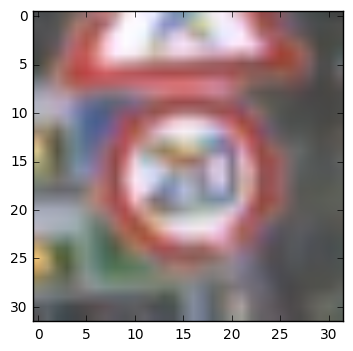

In [4]:
plt.imshow(X_train[0])
X_train[0]

array([[[ 0.33529412,  0.34470588,  0.35098039],
        [ 0.33215686,  0.33843137,  0.34470588],
        [ 0.36039216,  0.36352941,  0.36039216],
        ..., 
        [ 0.31019608,  0.33215686,  0.32901961],
        [ 0.30392157,  0.31647059,  0.31333333],
        [ 0.30705882,  0.31019608,  0.30705882]],

       [[ 0.3572549 ,  0.36039216,  0.36666667],
        [ 0.35098039,  0.35098039,  0.3572549 ],
        [ 0.37294118,  0.36980392,  0.36039216],
        ..., 
        [ 0.32901961,  0.34156863,  0.34156863],
        [ 0.33529412,  0.34156863,  0.33529412],
        [ 0.34784314,  0.34784314,  0.34156863]],

       [[ 0.34784314,  0.34784314,  0.35411765],
        [ 0.36352941,  0.36039216,  0.36666667],
        [ 0.3854902 ,  0.37607843,  0.37921569],
        ..., 
        [ 0.32588235,  0.33215686,  0.32588235],
        [ 0.33215686,  0.33529412,  0.3227451 ],
        [ 0.34470588,  0.34470588,  0.33215686]],

       ..., 
       [[ 0.49529412,  0.50156863,  0.5172549 ],
        

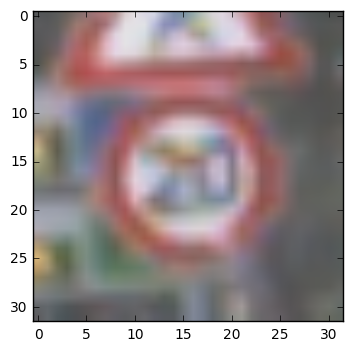

In [5]:
# testing the normalizing process
test_img = normalize_greyscale(X_train[0])
plt.imshow(test_img)
test_img

In [6]:
# train_features = normalize_greyscale(X_train)
# test_features = normalize_greyscale(X_test)

In [7]:
test = np.eye(43)
test


array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [8]:
y_train[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [9]:
img_size =32
img_size_flat = img_size *  img_size *3
img_shape = (img_size, img_size ,3)
num_classes = 43

In [10]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    #create figure with 3x3 sub-plots
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        #plot image
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        
        # show true and predicted classes
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        
        ax.set_xlabel(xlabel)
        
        # remove ticks from the plot 
        ax.set_xticks([])
        ax.set_yticks([])
        

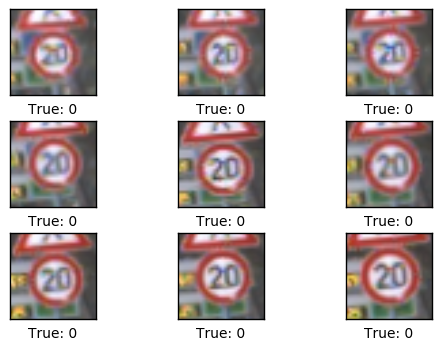

In [11]:
images = X_train[0:9]
cls_true = y_train[0:9]
plot_images(images = images, cls_true = cls_true)

In [12]:
len(X_train[0])

32

In [13]:
x = tf.placeholder(tf.float32, [None,  32,32,3])
x


<tf.Tensor 'Placeholder:0' shape=(?, 32, 32, 3) dtype=float32>

In [14]:
x_flat = tf.reshape(x, [-1,img_size_flat])
x_flat

<tf.Tensor 'Reshape:0' shape=(?, 3072) dtype=float32>

In [15]:
# this is the representation of the Y labels in the one hot encoded
y = tf.placeholder(tf.float32, [None, num_classes])
y
 

<tf.Tensor 'Placeholder_1:0' shape=(?, 43) dtype=float32>

In [16]:
y_true_cls = tf.placeholder(tf.int64, [None]) # this is the regular vertion : an idex of numbers which are the labels

# weights and biases

In [17]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

# build the model (linear) 

In [18]:
logits = tf.matmul(x_flat, weights) + biases

In [19]:
y_pred = tf.nn.softmax(logits)

In [20]:
y_pred_cls = tf.argmax(y_pred, dimension = 1)

In [21]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y)

In [22]:
cost = tf.reduce_mean(cross_entropy)

In [23]:
learning_rate = 0.1

In [24]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

In [25]:
correct_prediction = tf.equal(y_pred_cls, y_train)

In [26]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [27]:
init = tf.initialize_all_variables()

In [28]:
(y_test_encoded).shape

(12630, 43)

# Tensorflow session


In [29]:
# hyper parameters
learning_rate = 0.25
training_epochs = 1000
batch_size =  50
display_step = 100

start_time = time.time()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(n_samples/batch_size)
        
        for batch_i in range(total_batch):
            
            batch_start = batch_i*batch_size
            batch_x = X_train[batch_start:batch_start + batch_size]
            batch_y = y_train_encoded[batch_start:batch_start + batch_size]
            
            
            
            _,c = sess.run([optimizer, cost], feed_dict = {x: batch_x, y: batch_y})
            avg_cost+= c/total_batch
            
        if epoch % display_step == 0:
            print ("Epoch: ", '%04d' % (epoch+1), "cost=", avg_cost) 
            
    print("optimization finished!") 
    
    correct_prediction = tf.equal(y_pred_cls, y_test)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    end_time = time.time()
    compute_time = end_time - start_time
    print("accuracy: ", accuracy.eval({x: X_test, y: y_test_encoded}))
    print("time usage: " + str(timedelta(seconds= int(round(compute_time)))))

Epoch:  0001 cost= 92020.4030237
Epoch:  0101 cost= 17094.3791569
Epoch:  0201 cost= 12483.0836688
Epoch:  0301 cost= 3766.86240662
Epoch:  0401 cost= 2109.38125739
Epoch:  0501 cost= 1508.92647772
Epoch:  0601 cost= 1347.77418389
Epoch:  0701 cost= 1135.39394142
Epoch:  0801 cost= 1117.36289338
Epoch:  0901 cost= 1284.90143833
optimization finished!
accuracy:  0.215123
time usage: 0:15:29
